In [1]:
import at
import at.plot
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import math
from atFunction import *
from os import path, environ
import numpy as np

In [2]:
dir(at)
at.set_value_refpts?

In [3]:
#at.nonlinear.get_tunes_harmonic?

In [4]:
def buildLattice(QFAK= 0.51, QFBK= 0.52, QFCK=0.50):
    L0    = 170.88;
    C0    = 299792458; 
    HarmNumber = 285;
    energy = 2.9e9
    cork = 0
    corsk = 0
    CAV  = at.RFCavity('RF', 0, 2.7e+6, HarmNumber*C0/L0, HarmNumber, energy);
    COR   = at.Corrector('COR',0.15,[0, cork]);  
    CORSD = at.Corrector('COR',0.0,[0, corsk]);
    AP    = at.Aperture('AP',  [-0.01, 0.01, -0.01, 0.01]);
    BPM   = at.Monitor('BPM');
    GIRDER  = at.Marker('GIRDER');
    XSR   = at.Marker('XSRbeam');
    BMIT   = at.Marker('BMITbeam');
    SM   = at.Marker('SMbeam');
    BRKHS   = at.Marker('BRKbeam');
    WIGG = at.Wiggler('ID1', 1, 0.04, 1.3, 2.9e9, 5,4,(1, 1, 0, 1, 1, 0) )
#drift
    D1  = at.Drift('D1' , 1.2500);   
    D1A = at.Drift('D1A', 0.2910);
    D1B = at.Drift('D1B', 0.0660);
    D2A = at.Drift('D2A', 0.3390-.15/2); # % Was 0.264
    D2B = at.Drift('D2B', 0.1950-.15/2); # % Was 0.120
    D3  = at.Drift('D3',  0.3120); # % Was 0.534
    D4A = at.Drift('D4A', 0.3095); 
    D4B = at.Drift('D4B', 0.0975);  #% Was 0.0375
    D5  = at.Drift('D5',  0.3125);  #% Was 0.3335
    D6  = at.Drift('D6',  0.1695);
    D7  = at.Drift('D7',  0.3975); # % Was 0.4185
    D8A = at.Drift('D8A', 0.0920);  #% Was 0.1130
    D8B = at.Drift('D8B', 0.2300);
    D9A = at.Drift('D9A', 0.2100-.15/2);#  % Was 0.135
    D9B = at.Drift('D9B', 0.3240-.15/2); # % Was 0.249
    D10A = at.Drift('D10A', 0.0700);
    D10B = at.Drift('D10B', 0.2870);
    n= 1
    m = 1
    #QFAK = 0.51#1.40056022#1.95812072442795; 
    #QFBK = 0.531#0.30179568#1.40056022#1.43332618210432;
    #QFCK = 0.50202356#-2.04529679068196;
    SDK = 0.001; 
    SFK = 0.002;
    print(1/QFAK, 1/QFBK, 1/QFCK)
#Build a bending magnet out of peices
#We must take care to ensure that we get the correct edge focusing

    BEND1 = at.Bend('BEND', 1.87/15,2*pi/15, 0.2617994/15, EntranceAngle=0.105,FullGap= 0.05)# 0, -0.3972);

    BEND2 = at.Bend('BEND', 1.87/15,2*pi/15, 0.2617994/15)#, 0, 0, -0.3972, 0.0);
    BEND3 = at.Bend('BEND', 1.87/15,2*pi/15, 0.2617994/15)#, 0, 0.105, -0.3972, 0.05);

    BEND = [BEND1, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND3];
    
    #print('D1: \n', D1,'\n  total bend angle: \n', BEND3.BendingAngle*15*360/2/pi) 
#      '\n q3: \n',q3,'\n cavity: \n', CAV,'\n bpm: \n', BPM,'\n Girder: \n',GIRDER )
    QFA = at.Quadrupole('QFA', 0.18, QFAK )#, 'QuadLinearPass');
    QFB = at.Quadrupole('QFB', 0.18, QFBK )#, 'QuadLinearPass');
    QFC = at.Quadrupole('QFC', 0.26, QFCK )#, 'QuadLinearPass');
    SF = at.Sextupole('SF', 0.192  , SFK/2 )#, 'StrMPoleSymplectic4Pass'); %Convention: divide K2 by two

    SQK = 0.0001; #%Skew quad strength

    #imbed the corrector inside the sextupole (split sextupole)
    SEXTSD = at.Sextupole('SD', 0.192/2, SDK/2);
    SD = [SEXTSD, CORSD, SEXTSD];
    DBA = at.Lattice([AP, D1, D1A, WIGG, BPM, D1B, QFA, D2A, COR, D2B, QFB, D3,
                           BEND1, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND3,
                           D4A, BPM, D4B, SEXTSD, CORSD, SEXTSD, D5, QFC, D6, SF, D6, QFC, D7,
                           SEXTSD, CORSD, SEXTSD, D8A, BPM, D8B,AP,
                          BEND1, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND3,
                           AP,D3, QFB, D9A ,COR ,D9B, QFA, D10A, BPM, D10B, WIGG, D1],name='DBA lattice',
                          energy=energy, beam_current =0.22,periodicity=12);

    #print(DBA[0]),len(DBA)
    SR = DBA*12
    #print(SR[70],'\n', len(SR))
    SR.insert(0, CAV)
    #at.get_rf_voltage(SR)
    return SR
SR = buildLattice(QFAK= 0.51, QFBK= 0.52, QFCK=0.50)

1.9607843137254901 1.923076923076923 2.0


In [106]:
#same lattice different corrector magnets
def corLattice(cork1 ,cork2):
    L0    = 170.88;
    C0    = 299792458; 
    HarmNumber = 285;
    energy = 2.9e9
    #cork = 0
    #corsk = 0
    QFAK= 0.51
    QFBK= 0.52
    QFCK=0.50
    CAV  = at.RFCavity('RF', 0, 2.7e+6, HarmNumber*C0/L0, HarmNumber, energy);
    COR   = at.Corrector('COR',0.15,[cork1, cork2]);  
    CORSD = at.Corrector('COR',0.0,[0, 0]);
    AP    = at.Aperture('AP',  [-0.01, 0.01, -0.01, 0.01]);
    BPM   = at.Monitor('BPM');
    GIRDER  = at.Marker('GIRDER');
    XSR   = at.Marker('XSRbeam');
    BMIT   = at.Marker('BMITbeam');
    SM   = at.Marker('SMbeam');
    BRKHS   = at.Marker('BRKbeam');
    WIGG = at.Wiggler('ID1', 1, 0.04, 1.3, 2.9e9, 5,4,(1, 1, 0, 1, 1, 0))
#drift
    D1  = at.Drift('D1' , 1.2500);   
    D1A = at.Drift('D1A', 0.2910);
    D1B = at.Drift('D1B', 0.0660);
    D2A = at.Drift('D2A', 0.3390-.15/2); # % Was 0.264
    D2B = at.Drift('D2B', 0.1950-.15/2); # % Was 0.120
    D3  = at.Drift('D3',  0.3120); # % Was 0.534
    D4A = at.Drift('D4A', 0.3095); 
    D4B = at.Drift('D4B', 0.0975);  #% Was 0.0375
    D5  = at.Drift('D5',  0.3125);  #% Was 0.3335
    D6  = at.Drift('D6',  0.1695);
    D7  = at.Drift('D7',  0.3975); # % Was 0.4185
    D8A = at.Drift('D8A', 0.0920);  #% Was 0.1130
    D8B = at.Drift('D8B', 0.2300);
    D9A = at.Drift('D9A', 0.2100-.15/2);#  % Was 0.135
    D9B = at.Drift('D9B', 0.3240-.15/2); # % Was 0.249
    D10A = at.Drift('D10A', 0.0700);
    D10B = at.Drift('D10B', 0.2870);
    n= 1
    m = 1
    #QFAK = 0.51#1.40056022#1.95812072442795; 
    #QFBK = 0.531#0.30179568#1.40056022#1.43332618210432;
    #QFCK = 0.50202356#-2.04529679068196;
    SDK = 0.001; 
    SFK = 0.002;
    #print(1/QFAK, 1/QFBK, 1/QFCK)
#Build a bending magnet out of peices
#We must take care to ensure that we get the correct edge focusing

    BEND1 = at.Bend('BEND', 1.87/15,2*pi/15, 0.2617994/15, EntranceAngle=0.105,FullGap= 0.05)# 0, -0.3972);

    BEND2 = at.Bend('BEND', 1.87/15,2*pi/15, 0.2617994/15)#, 0, 0, -0.3972, 0.0);
    BEND3 = at.Bend('BEND', 1.87/15,2*pi/15, 0.2617994/15)#, 0, 0.105, -0.3972, 0.05);

    BEND = [BEND1, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND3];
    
    #print('D1: \n', D1,'\n  total bend angle: \n', BEND3.BendingAngle*15*360/2/pi) 
#      '\n q3: \n',q3,'\n cavity: \n', CAV,'\n bpm: \n', BPM,'\n Girder: \n',GIRDER )
    QFA = at.Quadrupole('QFA', 0.18, QFAK )#, 'QuadLinearPass');
    QFB = at.Quadrupole('QFB', 0.18, QFBK )#, 'QuadLinearPass');
    QFC = at.Quadrupole('QFC', 0.26, QFCK )#, 'QuadLinearPass');
    SF = at.Sextupole('SF', 0.192  , SFK/2 )#, 'StrMPoleSymplectic4Pass'); %Convention: divide K2 by two

    SQK = 0.0001; #%Skew quad strength

    #imbed the corrector inside the sextupole (split sextupole)
    SEXTSD = at.Sextupole('SD', 0.192/2, SDK/2);
    SD = [SEXTSD, CORSD, SEXTSD];
    DBA = at.Lattice([AP, D1, D1A, WIGG, BPM, D1B, QFA, D2A, COR, D2B, QFB, D3,
                           BEND1, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND3,
                           D4A, BPM, D4B, SEXTSD, CORSD, SEXTSD, D5, QFC, D6, SF, D6, QFC, D7,
                           SEXTSD, CORSD, SEXTSD, D8A, BPM, D8B,AP,
                          BEND1, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND3,
                           AP,D3, QFB, D9A ,COR ,D9B, QFA, D10A, BPM, D10B, WIGG, D1],name='DBA lattice',
                          energy=energy, beam_current =0.22,periodicity=12);

    #print(DBA[0]),len(DBA)
    SR = DBA*12
    #print(SR[70],'\n', len(SR))
    #SR.insert(0, CAV)
    #at.get_rf_voltage(SR)
    return SR
SR = corLattice(0,0)
SR[4]

Wiggler('ID1', 1.0, 0.04, 1.3, 2900000000.0)

In [8]:
#dir(at.RFCavity) #HarmNumber*C0/L0
SR[0].Voltage

AttributeError: 'Aperture' object has no attribute 'Voltage'

DBAcell = at.Lattice([HalfDr, Aper,QF , Dr , QD , Dr, Bend, Dr, QF, Dr, Bend, Dr, QD, Dr, QF, Aper,HalfDr],
                      name='Simple DBA cell', energy=2.9E9)
print(DBAcell)

Quadrupole:
	FamName : QFA
	Length : 0.18
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.   0.51]
	K : 0.51


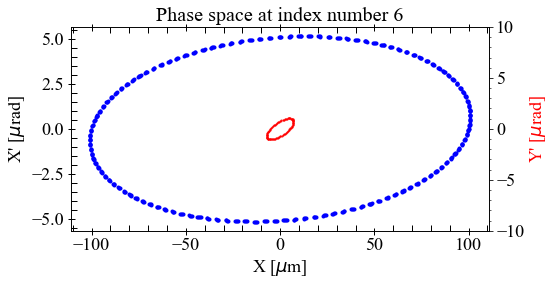

In [9]:
lat_pas(SR, 500, 6, False) 

Monitor:
	FamName : BPM
	Length : 0.0
	PassMethod : IdentityPass


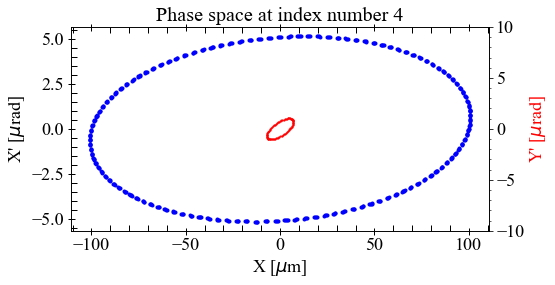

In [10]:
nturns=500
ref = 6
lat_pas(SR, nturns, 4, False) 

Quadrupole:
	FamName : QFA
	Length : 0.18
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.   0.51]
	K : 0.51 0.01717785


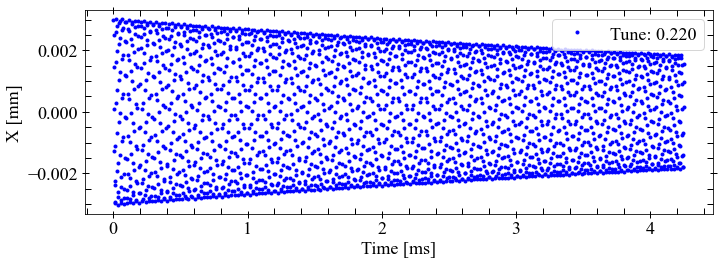

In [11]:
nturns=2500
ref = 6
tune = 0.24
damp, xx = plot_bpm_x(SR, nturns, ref , tune, False)

Quadrupole:
	FamName : QFA
	Length : 0.18
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.   0.51]
	K : 0.51 0.01717785


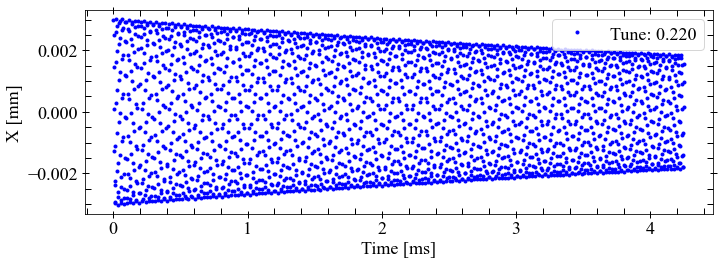

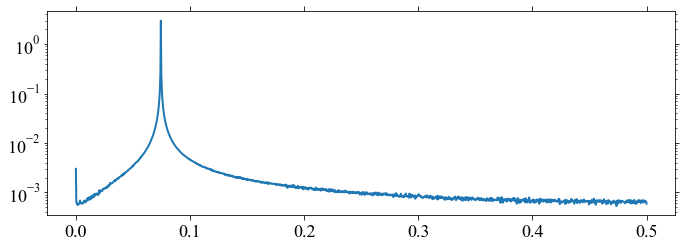

In [12]:
SR = corLattice(cork1 = 0, cork2= 0)
nturns = 2500
ref = 6
damp, xx = plot_bpm_x(SR, nturns, ref , 0.24, False)
plt.show()
noise = np.random.normal(-1e-6,1e-6,len(xx))
xx =xx +noise
ss =np.linspace(0,0.5,len(xx)// 2)
plt.plot(ss,np.abs(np.fft.fft(xx))[:len(xx)//2])
plt.yscale('log')
plt.show()

2.0 2.0 1.7857142857142856


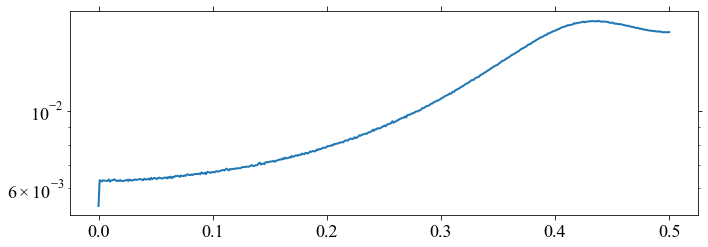

2.0 2.0 1.7857142857142856


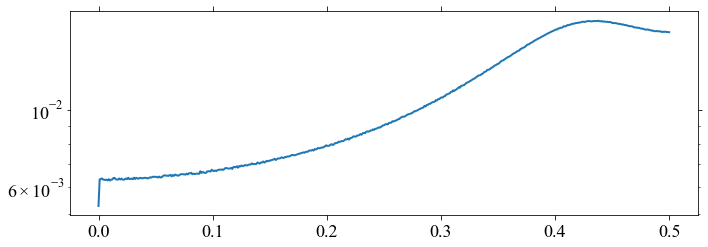

In [13]:
qfak = np.linspace(-0.35, 0.55, 2)

for i in range(len(qfak)):
    SR = buildLattice(QFAK= 0.5, QFBK= 0.5, QFCK = 0.56)
    damp, xx, yy= orbit_x(SR, nturns=1000, ref_point=6 ,tune=0.22,  save=False)
    noise = np.random.normal(-1e-6,1e-6,len(xx))
    xx =xx +noise
    ss =np.linspace(0,0.5,len(xx)// 2)
    plt.plot(ss,np.abs(np.fft.fft(xx))[:len(xx)//2], label=str(qfak[i]))
    plt.yscale('log')
    plt.show()

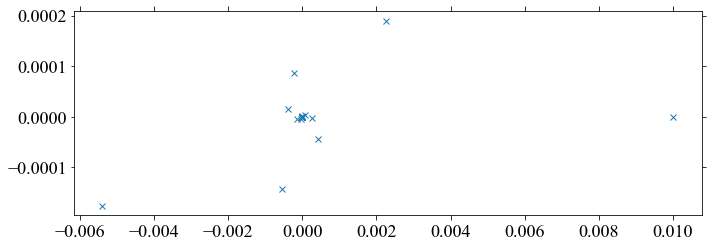

In [14]:
damp, xx, yy= orbit_x(SR, nturns=700, ref_point=6 ,tune=0.22,  save=False)
plt.plot(xx, yy, marker='x', ls= 'none')
#plt.plot(yy)

In [15]:
# cavity on, radiation on
SR.enable_6d()

#cavity on, radiation off
SR.disable_6d(cavity_pass='RFCavityPass')

#cavity off, radiation on
#SR.enable_6d(cavity_pass='IdentityPass')

#cavity off, radiation off
SR.disable_6d()

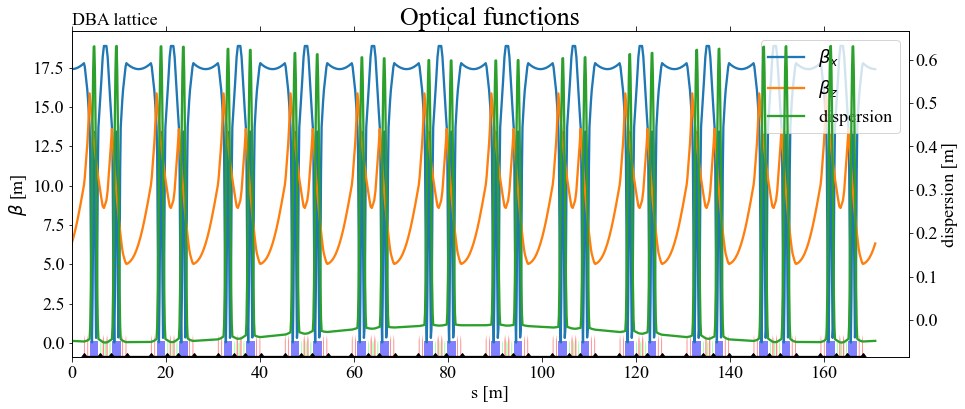

(<AxesSubplot:title={'left':'DBA lattice','center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:label='420086e4-a8b9-4679-b3ad-7696e5325b22', ylabel='dispersion [m]'>,
 <AxesSubplot:label='e544e935-59d9-4bae-b044-7e7ce42e42a9'>)

In [15]:
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['legend.loc'] ='upper right'
plt.rcParams['lines.linewidth'] = 2.3

SR.plot_beta(dp =0.001,s_range=[0,178]) 
#geom,radius,ax = SR.plot_geometry()
#SR.plot_geometry?
#2*pi*radius, geom

In [65]:
sig_x = np.sqrt(22*1e-10 + (0.1*0.001)**2)
sig_x

0.0005021951811795888

In [16]:
[_, beamdata, _] = at.get_optics(SR)
print(beamdata.tune)
print(beamdata.chromaticity)

[0.43080441 0.36210685 0.10723128]
[nan nan nan]


In [54]:
at.detuning?

In [53]:
at.detuning(SR)

(array([[0.43080445, 0.36210692],
        [0.43080445, 0.36210692]]),
 array([[ 7692.551912  ,   134.63949998],
        [  134.69088892, 23527.76717128]]),
 array([-3.e-05,  0.e+00,  3.e-05]),
 array([[0.43080468, 0.36210692],
        [0.43080445, 0.36210692],
        [0.43080471, 0.36210692]]),
 array([-3.e-05,  0.e+00,  3.e-05]),
 array([[0.43080447, 0.3621092 ],
        [0.43080445, 0.36210692],
        [0.43080446, 0.36210879]]))

In [17]:
refqf = at.get_cells(SR, 'FamName', 'QFA')   # FamName attribute == QFA
#print(list(SR[refqf]))
refqd = at.get_cells(SR, 'FamName', 'QFB')   # FamName attribute == QFB
#print(list(SR[refqd]))
refqq = at.get_cells(SR, 'FamName', 'QFC') # FamName attribute == QFC
#print(list(SR[refqq]))

In [161]:
refq1 = at.get_cells(SR, at.checkname('QFA'))# at.checktype(at.Quadrupole))   # class == Quadrupole
#print(list(SR[refq1]))
refq2 = at.get_cells(SR, at.checkname('QFB'))         # name matches a pattern
#print(list(SR[refq2]))
refq3 = at.get_cells(SR, at.checkname('QFC')) # Existing BendingAngle attribute
print(list(SR[refq3]))

[Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5), Quadrupole('QFC', 0.26, 0.5)]


In [19]:
for elem in SR.select(refq1 | refq2):
     print(elem)
#refq1, refq = np.flatnonzero(refq2)[2:4]  
#refq1, refq

Quadrupole:
	FamName : QFA
	Length : 0.18
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.  0.5]
	K : 0.5
Quadrupole:
	FamName : QFB
	Length : 0.18
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.  0.5]
	K : 0.5
Quadrupole:
	FamName : QFB
	Length : 0.18
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.  0.5]
	K : 0.5
Quadrupole:
	FamName : QFA
	Length : 0.18
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.  0.5]
	K : 0.5
Quadrupole:
	FamName : QFA
	Length : 0.18
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.  0.5]
	K : 0.5
Quadrupole:
	FamName : QFB
	Length : 0.18
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.  0.5]
	K : 0.5
Quadrupole:
	FamName :

In [20]:
at.fit_tune(SR, refq1, refq2, [0.22, 0.24], keep_lattice =True)


Fitting Tune...
Initial value [0.43078146 0.36210645]
iter# 0 Res. 0.0015054507375267129
iter# 1 Res. 0.00027717885972928586
iter# 2 Res. 5.832989538381595e-05
Final value [0.22595786 0.24477848] 



In [22]:
refqall = at.get_cells(SR, at.checktype(at.Quadrupole)) 
tilts = np.pi*np.random.rand(len(SR[refqall]))/180
rot = np.pi*np.random.rand(len(SR[refqall]))/180

at.set_rotation(SR[refqall], rot, relative=False)
at.set_tilt(SR[refqall],  tilts,relative=False)

In [23]:
len(SR[refqall]), len(tilts)

(72, 72)

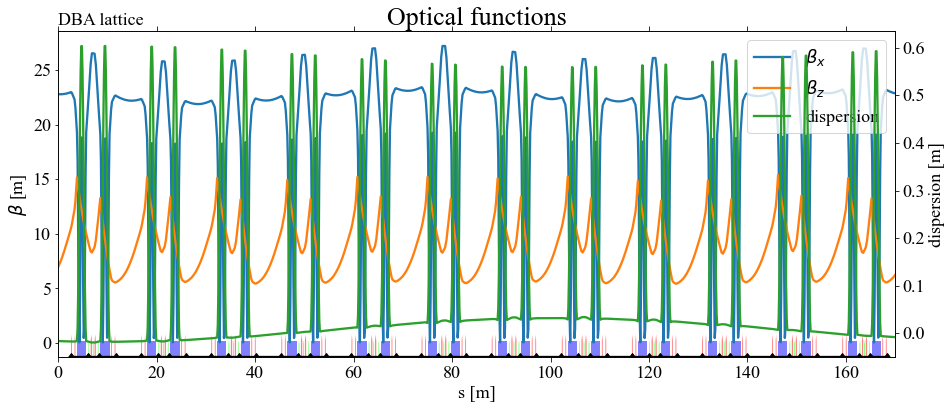

(<AxesSubplot:title={'left':'DBA lattice','center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:label='259bbd6b-3538-4170-bdf5-f8a4b0bac64d', ylabel='dispersion [m]'>,
 <AxesSubplot:label='695a9c89-9856-4e74-8726-ea8bf1a316a4'>)

In [24]:
SR.plot_beta(dp =0.001,s_range=[0,170]) 

In [168]:
#SR = corLattice(cork1 =0, cork2= 0)
ref_cor_all = at.get_cells(SR, 'FamName', 'COR') 
ref_bpm_all = at.get_cells(SR, 'FamName','BPM') 
orbit_cell = at.get_cells(SR, 'attrname' ,'length')
Newsr = at.set_value_refpts(SR, SR[ref_cor_all][12], 'KickAngle', 10e-6,0, 'copy', True)
Newsr = at.set_value_refpts(SR, SR[ref_cor_all][13], 'KickAngle', 10e-6,0, 'copy', True)
orbit_cell[:]=True


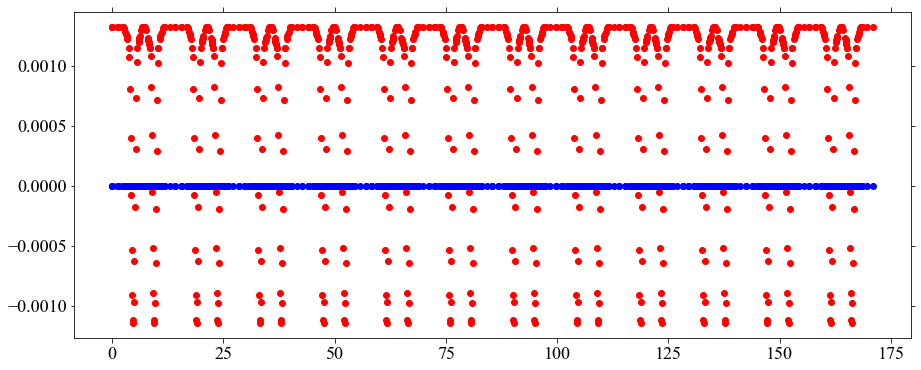

In [169]:
#### SR = corLattice(cork1 = 70e-6, cork2= 0e-6)
orbit = at.find_orbit6(Newsr, refpts=ref_bpm_all)
s_bpm = at.get_s_pos(SR,ref_bpm_all)

orbit_all = at.find_orbit6(Newsr, refpts=orbit_cell)
orbit_0 = at.find_orbit6(SR, refpts=orbit_cell)
s_pos = at.get_s_pos(Newsr, orbit_cell)
rpoint= 0
#plt.plot(ref_bpm_all, orbit[0,:])
for i in range(len(orbit_cell)):
    #plt.plot(s_bpm[i], orbit[1][:][i][rpoint],c='b', marker='o', ls='solid')
    plt.plot(s_pos[i], orbit_all[1][:][i][rpoint],c='r', marker='o', ls='solid')
    plt.plot(s_pos[i], orbit_0[1][:][i][rpoint],c='b', marker='o', ls='solid')


In [166]:
sig_x = np.sqrt(15*1e-10 + (2*0.001)**2)
sig_x

0.0020003749648503403

In [181]:
m44, _ = at.find_m44(SR,0)
print(m44)

AtError: _orbit_dp needs "ring.is_6d" False

In [128]:
wigg= at.Wiggler('IDwig', 1.6, 0.20, 1.4
                 , 2.9e9, Nstep=20, Nmeth=4, By=(1, 1, 0, 1, 1, 0) )
print(wigg)

Wiggler:
	FamName : IDwig
	Length : 1.6
	PassMethod : GWigSymplecticPass
	Lw : 0.2
	Bmax : 1.4
	Nstep : 20
	Nmeth : 4
	By : [[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]
	Bx : []
	Energy : 2900000000.0
	NHharm : 1
	NVharm : 0


[(0,), (1,)]
[(0,)]


<Figure size 3105x945 with 0 Axes>

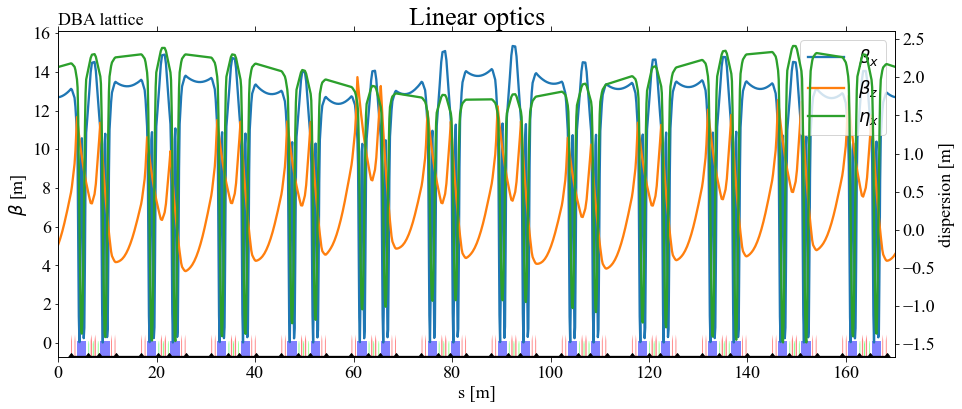

(<AxesSubplot:title={'left':'DBA lattice','center':'Linear optics'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:label='b3e7b595-1c51-4ad6-b52e-d04c9ff1a044', ylabel='dispersion [m]'>,
 <AxesSubplot:label='8afc3e6e-57ec-42ab-9e10-fbd149e936ec'>)

In [167]:

f = plt.figure(figsize=(3*3.45 ,3.15 ), dpi=300)
at.plot.plot_linear(SR,('beta', [0, 1]), ('dispersion', 0))


In [168]:
[_, beamdata, _] = at.get_optics(SR, get_chrom=True)
print(beamdata.tune)
print(beamdata.chromaticity)

[0.22134812 0.25432933 0.10883762]
[-258.74214685  -26.3112386     2.32085839]


In [169]:
mask=np.zeros(len(SR), dtype=bool)
mask[6] = True
mask[17] = True
list(SR[mask])

[Drift('D1B', 0.066),
 Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335)]

In [170]:
#add the cavity to the ring
RFC = at.RFCavity('RFC', 0.00, 1e6, 500e6, 100, 3.0E9, PassMethod='IdentityPass')
#SR.insert(0, RFC)
#FODOSext.harmonic_number=100
print(SR[0])

RFCavity:
	FamName : RF
	Length : 0.0
	PassMethod : RFCavityPass
	Voltage : 2700000.0
	Frequency : 500004977.3525281
	HarmNumber : 285
	Energy : 2900000000.0
	TimeLag : 0.0


In [171]:
def emittance(tune_X, tune_Y):
    at.fit_tune(SR, refq1, refq2, [tune_X, tune_Y], keep_lattice =False)
    print(at.radiation_parameters(SR).emittances)
    
emittance(0.22, 0.28)


Fitting Tune...
Initial value [0.20988221 0.2534406 ]
iter# 0 Res. 4.957728287045728e-06
iter# 1 Res. 9.789011093445081e-08
iter# 2 Res. 1.54791117815628e-09
Final value [0.22003471 0.28001853] 

[0.00276423        nan        nan]


In [172]:
emittance(0.24, 0.28)


Fitting Tune...
Initial value [0.22003471 0.28001853]
iter# 0 Res. 1.1006052672173893e-07
iter# 1 Res. 4.756121210487063e-10
iter# 2 Res. 1.5021580739299666e-12
Final value [0.23999901 0.28000072] 

[0.00276696        nan        nan]


In [71]:
[_, beamdata, _] = at.get_optics(SR, get_chrom=True)
print(beamdata.tune)
print(beamdata.chromaticity)

[0.22000274 0.24000529 0.1072143 ]
[-1.01003827e+02 -1.81917423e+01  5.34440148e-02]


Aperture:
	FamName : AP
	Length : 0.0
	PassMethod : AperturePass
	Limits : [-0.01  0.01 -0.01  0.01] 0.005535616835334854


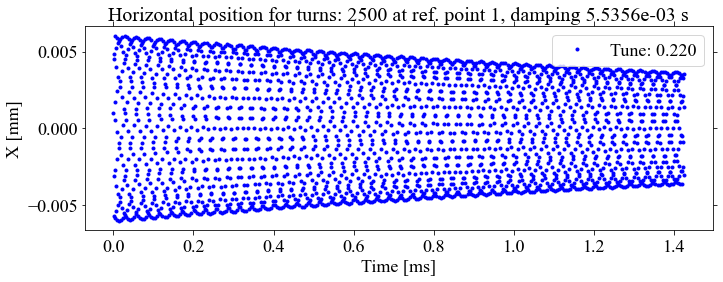

In [35]:
def plot_bpm_x(nturns, ref_point ):
    #nturns=500
    ref = SR[ref_point]
    time = nturns*0.57e-6 #second
    damp = at.radiation_parameters(SR).Tau[0]#0.00123748 #s
    tune = 0.22#at.radiation_parameters(SR).tunes[0]
    tt = np.linspace(0,time, nturns)
    Z03 = np.array([1e-6, -1e-6, 0, 0, 0, 0])
    Z3=at.lattice_pass(SR,Z03,nturns, refpts=ref)
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['ytick.right'] = True
    plt.rcParams["figure.figsize"] = [3*3.75, 3.75]
    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['xtick.top'] = True
    plt.rcParams['legend.loc'] ='upper right'
    plt.rcParams['lines.linewidth'] = 2
    font = {'family':'Times New Roman',
       'weight' : 'normal',
       'size' : 18 }
    plt.rc('font',**font)
    plt.title('Horizontal position for turns: %d at ref. point %d, damping %.4e s' %(nturns, ref_point, damp) )

    plt.plot( tt*1000, 1000*Z3[0, 0, 0, :]*np.exp(-2*tt/damp),'.',c='b', label='Tune: %0.3f' %tune)
    plt.ylabel("X [mm]")
    plt.xlabel("Time [ms]")
    plt.legend()
    print(ref, damp)
    #plt.savefig('bpm'+str(tune)+'_hor.png', dpi =250)
plot_bpm_x(2500, 1)

Drift:
	FamName : D2B
	Length : 0.12000000000000001
	PassMethod : DriftPass


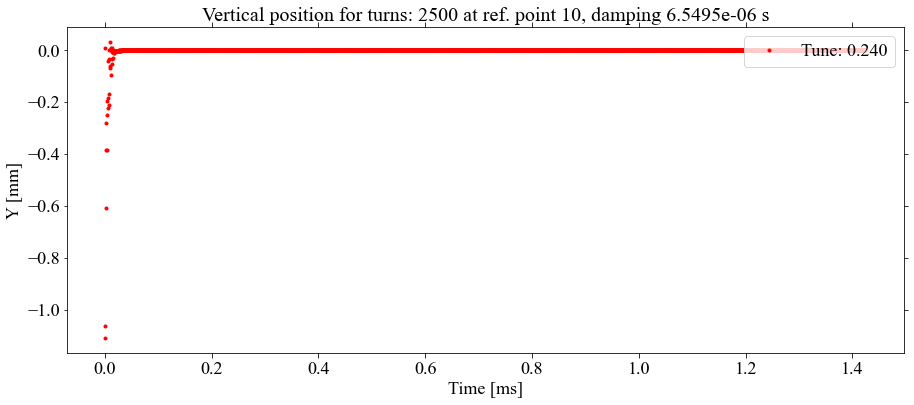

In [173]:
def plot_bpm_y(nturns, ref_point ):
    #nturns=500
    ref = SR[ref_point]
    time = nturns*0.57e-6 #second
    damp = at.radiation_parameters(SR).Tau[1] #0.00121242 #s
    tune = 0.24#at.radiation_parameters(SR).tunes[1]
    tt = np.linspace(0,time, nturns)
    Z03 = np.array([0, 0, 10e-6, -10e-6, 0.00, 0.0])
    Z3=at.lattice_pass(SR,Z03,nturns, refpts=ref)
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['ytick.right'] = True
    plt.title('Vertical position for turns: %d at ref. point %d, damping %.4e s' %(nturns, ref_point, damp) )
    plt.rcParams["figure.figsize"] = [3*3.75, 3.75]
    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['xtick.top'] = True
    plt.rcParams['legend.loc'] ='upper right'
    plt.rcParams['lines.linewidth'] = 2
    plt.plot( tt*1000, 1000*Z3[2, 0, 0, :]*np.exp(-2*tt/damp),'.', c='r', label='Tune: %0.3f' %tune)
    plt.ylabel("Y [mm]")
    plt.xlabel("Time [ms]")
    plt.legend()
    font = {'family':'Times New Roman',
       'weight' : 'normal',
       'size' : 18 }
    plt.rc('font',**font)
    print(ref)
    #plt.savefig('bpm'+str(tune)+'_ver.png', dpi =250)
plot_bpm_y(2500, 10)

Drift:
	FamName : D1B
	Length : 0.066
	PassMethod : DriftPass


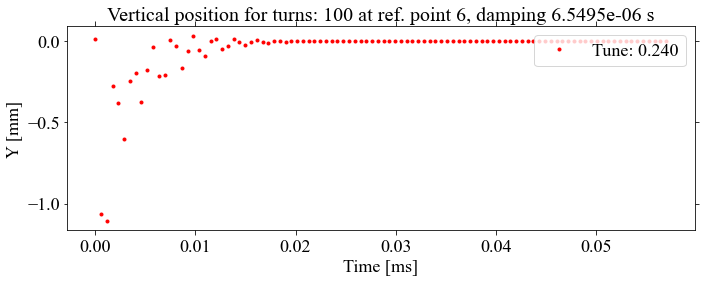

In [174]:
plot_bpm_y(100, 6)

In [42]:
SR

Lattice([RFCavity('RFC', 0.0, 1000000.0, 500000000.0, 100, 2900000000.0, PassMethod='IdentityPass'), RFCavity('RF', 0.0, 2700000.0, 500004977.3525281, 285, 2900000000.0), Aperture('AP', array([-0.1,  0.1, -0.1,  0.1])), Drift('D1', 2.25), Drift('D1A', 0.291), Monitor('BPM'), Drift('D1B', 0.066), Quadrupole('QFA', 0.18, 0.8689528413898636), Drift('D2A', 0.264), Corrector('COR', 0.15, array([0., 0.])), Drift('D2B', 0.12000000000000001), Quadrupole('QFB', 0.18, 0.6839642605469335), Drift('D3', 0.312), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335, EntranceAngle=0.105, FullGap=0.05), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.01

[(0,), (1,)]
[(0,)]


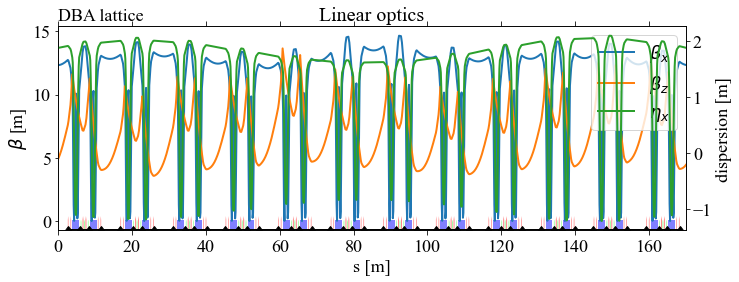

(<AxesSubplot:title={'left':'DBA lattice','center':'Linear optics'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:label='30c5f246-0362-40a9-99b8-b30d76fc30ef', ylabel='dispersion [m]'>,
 <AxesSubplot:label='c8856240-cd48-4725-a351-42779f8e89c3'>)

In [175]:
at.plot.plot_linear(SR,('beta', [0, 1]), ('dispersion', 0))

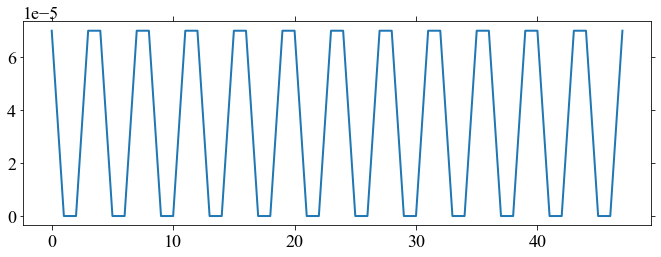

In [178]:
corrector_angle = at.get_value_refpts(SR, at.elements.Corrector, 'KickAngle', 0)
#This searches in ring, for all elements that match a quadrupole, then finds
#the PolynomB attribute, and takes the second index (python indexes start at 0)

plt.plot(corrector_angle)

In [182]:
# cavity on, radiation on
SR.enable_6d()

#cavity on, radiation off
#SR.disable_6d(cavity_pass='RFCavityPass')

#cavity off, radiation on
#SR.enable_6d(cavity_pass='IdentityPass')

#cavity off, radiation off
#SR.disable_6d()

freq_old = SR.get_rf_voltage()
SR.set_rf_frequency()
freq_new = SR.get_rf_frequency()
freq_old - freq_new

-497304977.35252804

In [153]:
print(freq_old/1e6, 'MHz')
print(freq_new/1e6, 'MHz')
print(SR.harmonic_number, SR.revolution_frequency*SR.harmonic_number/1e6)

2.7 MHz
500.00497735252804 MHz
285 500.00497735252804


In [179]:
SR.save('./SR1.mat', mat_key='SR1')
#DBAcell.save('./DBAcls.mat', mat_key='DBAcls')

In [184]:
voltage_old = SR.get_rf_voltage()

at.set_rf_voltage(SR,voltage=9.7e8)
voltage_new = SR.get_rf_voltage()
voltage_old,voltage_new 

(2700000.0, 970000000.0)

In [16]:
print(at.radiation_parameters(SR))

  Frac. tunes (6D motion): [0.09247039 0.5483154  0.10891892]
                    Tunes: [25.09247039  3.5483154   0.10891892]
           Chromaticities: [-320.002173     -4.23692836   22.61374911]
 Momentum compact. factor: 2.618799e-01
              Slip factor: -2.618799e-01
                   Energy: 2.900000e+09 eV
       Energy loss / turn: 5.047632e+08 eV
 Radiation integrals - I1: 44.750037508915995 m
                       I2: 506.8916829834063 m^-1
                       I3: 1702.4483332445884 m^-2
                       I4: 456.4244746066112 m^-1
                       I5: 20483.555582128458 m^-1
          Mode emittances: [0.00500923        nan        nan]
Damping partition numbers: [0.09956212 1.         2.90043788]
            Damping times: [6.57834656e-05 6.54954101e-06 2.25812145e-06] s
            Energy spread: 0.00378037
             Bunch length: nan m
         Cavities voltage: 2700000.0 V
        Synchrotron phase: nan rd
    Synchrotron frequency: nan Hz


In [90]:
at.get_lifetime(SR, 12e-11, 200e-3/267, 
    emitx=None,
    sigs=None,
    sigp=None,
    zn=None,
    momap=None,
    refpts=None,)

ValueError: array must not contain infs or NaNs

In [27]:
boundaryY,trackedY, survivedY = at.get_vertical_acceptance(SR, 1e-6, 1e-3,nturns=100, dp=0.0,
                                                           refpts=refqall, grid_mode='CARTESIAN')


AttributeError: 'Wiggler' object has no attribute 'Energy'